In [90]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [91]:
np.random.seed(2222)

In [92]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [93]:
print(X_train.shape, X_test.shape)
print(X_train.shape[0])

(60000, 28, 28) (10000, 28, 28)
60000


In [94]:
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to the number of labels.'
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels.'
assert(X_train.shape[1:] == (28, 28)), 'The dimensions of the images are not 28x28'
assert(X_test.shape[1:] == (28, 28)), 'The dimensions of the images are not 28x28'

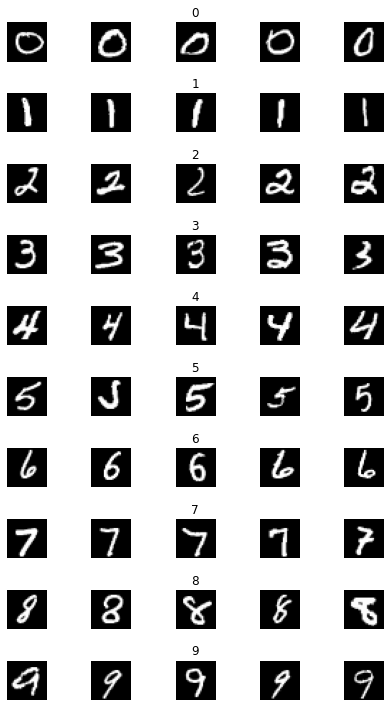

In [95]:
n_samples = []
cols=5
n_classes=10
fig, ax = plt.subplots(nrows=n_classes, ncols=cols, figsize=(6, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(n_classes):
        x_selected = X_train[y_train==j]
        ax[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap('gray'))
        ax[j][i].axis('off')
        if i == int(cols/2):
            ax[j][i].set_title(str(j))
            n_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


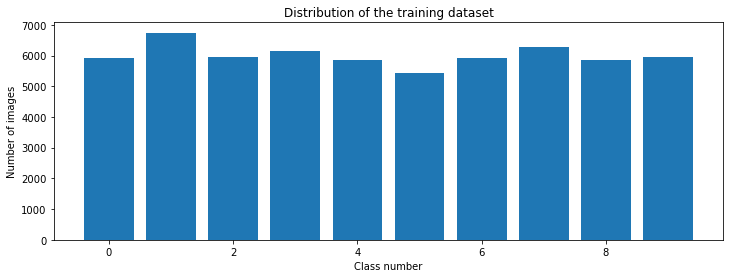

In [96]:
print(n_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), n_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')
plt.show()

In [97]:
np.std(n_samples)

322.082908581005

In [98]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [99]:
y_train.shape

(60000, 10)

In [100]:
X_train = X_train/255
X_test = X_test/255

In [101]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [102]:
X_train.shape

(60000, 28, 28, 1)

In [103]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [104]:
model = leNet_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 375)               0         
                                                                 
 dense_6 (Dense)             (None, 500)              

In [105]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=True)

Epoch 1/10


2022-09-06 01:05:46.692503: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


135/135 [==============================] - 25s 183ms/step - loss: 0.2743 - accuracy: 0.9123 - val_loss: 0.0628 - val_accuracy: 0.9812
Epoch 2/10
135/135 [==============================] - 33s 245ms/step - loss: 0.0776 - accuracy: 0.9762 - val_loss: 0.0449 - val_accuracy: 0.9858
Epoch 3/10
135/135 [==============================] - 35s 257ms/step - loss: 0.0641 - accuracy: 0.9796 - val_loss: 0.0413 - val_accuracy: 0.9892
Epoch 4/10
135/135 [==============================] - 31s 228ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0434 - val_accuracy: 0.9877
Epoch 5/10
135/135 [==============================] - 32s 235ms/step - loss: 0.0502 - accuracy: 0.9844 - val_loss: 0.0383 - val_accuracy: 0.9893
Epoch 6/10
135/135 [==============================] - 32s 241ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0428 - val_accuracy: 0.9875
Epoch 7/10
135/135 [==============================] - 31s 233ms/step - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0390 - val_accuracy: 0.9

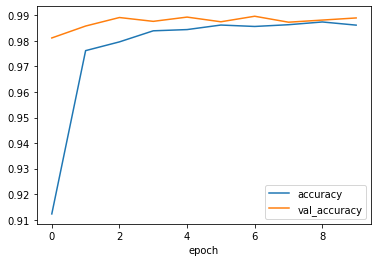

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

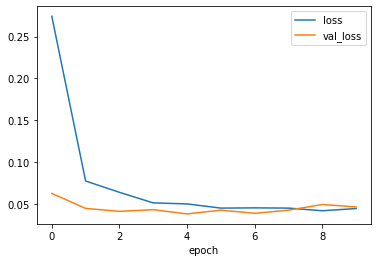

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

In [108]:
score = model.evaluate(X_test, y_test, verbose=0)
print('accuracy = ', round(score[1], 5), '\nloss = ', round(score[0], 5))

accuracy =  0.988 
loss =  0.04524


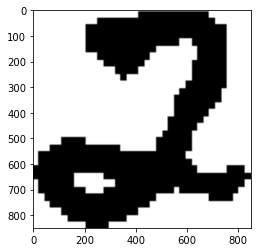

In [109]:
import requests
from PIL import Image
url = 'https://i.im.ge/2022/09/05/O8hkic.Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

In [110]:
import cv2
def prepare(img):
    img_array = np.asanyarray(img)
    resized = cv2.resize(img_array, (28, 28))
    gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    final = cv2.bitwise_not(gray_scale)
    return final

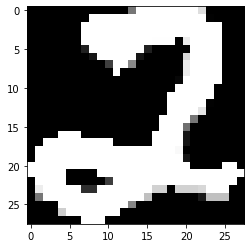

In [111]:
gray_img = prepare(img)
plt.imshow(gray_img, cmap=plt.get_cmap('gray'))

In [112]:
gray_img = gray_img/255
gray_img =gray_img.reshape(1, 28, 28)

In [113]:
prediction = model.predict(gray_img, verbose=0)
classes_x=np.argmax(prediction,axis=1)
print('predicted digit', str(classes_x))

predicted digit [2]


In [114]:
model.save('')

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets
